In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Shagnik\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
df.shape

(891, 12)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# Columns Types
# Numerical - Age, Fare, PassengerId
# Categorical - Survived, Pclass,Sex, SibSp, Parch, Embarked
# Mixed - Name, Ticket, Cabin

In [4]:
# Univariate Analysis
# Univariate analysis focuses on analyzing each feature in the dataset independently.

# Distribution analysis: The distribution of each feature is examined to identify its shape, central tendency, and 
# dispersion.

#Identifying potential issues: Univariate analysis helps in identifying potential problems with the data such as outliers, 
# skewness, and missing values

In [5]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [6]:
# It tells us about the maximum,minimum and mean ages of the passengers who were on board the Titanic along with other stats

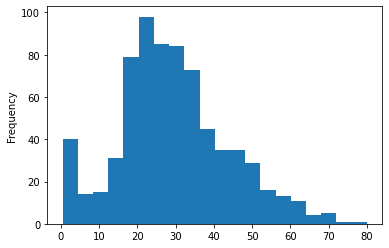

In [11]:
df['Age'].plot(kind='hist', bins=20)
plt.show()

In [12]:
# This tells us that the most of the passengers were between the ages of 18 to 46. Also there were quite a few infants and
# toddlers as well. Very few passengers were on board beyond 70 years of age

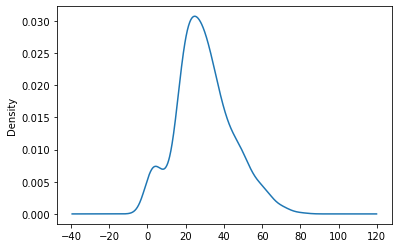

In [15]:
df['Age'].plot(kind='kde')
plt.show()

In [16]:
# We can say that the distribution is almost Normal if not completely Normal. The slight kink towards the left could be 
# ignored.

In [17]:
df['Age'].skew()

0.38910778230082704

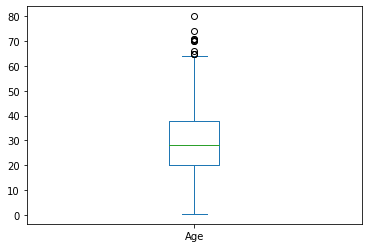

In [18]:
# Outlier detection
df['Age'].plot(kind='box')
plt.show()

In [20]:
# So there is a presence of outliers quite naturally as we inferred from the boxplot. Also the same reconfirms the stats
# pulled by the describe function. So we can say that the upper limit of our variable is around 65

In [21]:
df[df['Age'] > 65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [22]:
# This reconfirms that the outliers truly lie beyond the threshold of Age > 65

In [24]:
# Missing value Detection
nulls = df['Age'].isnull().sum()
null_pct=round(df['Age'].isnull().sum()/len(df['Age'])*100,2)

In [25]:
nulls,null_pct

(177, 19.87)

In [26]:
# So we can see there are 177 Null Values and that makes up about 19.87% of the total number of Age records present in our
# dataset

### Conclusions drawn from Age column

In [27]:
# There is about 20% missing values in the Age column
# Outliers were detected
# It is almost normally distributed

In [28]:
# Now we'll check the Fare attribute
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [29]:
# There are few people travelling for free, mean ticket price being $32 and the highest someone paid was a whopping $512

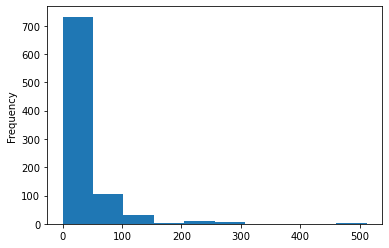

In [32]:
df['Fare'].plot(kind='hist', bins=10)
plt.show()

In [33]:
# It definitely is not Normally Distributed and is Skewed. We can say quite a large number of passengers were travelling
# with cheap tickets and only a few were having first class or high end tickets

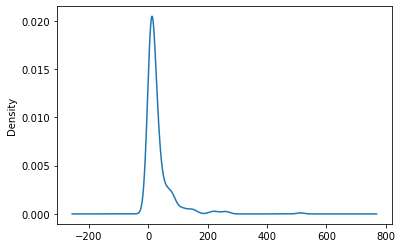

In [35]:
df['Fare'].plot(kind='kde')
plt.show()

In [36]:
df['Fare'].skew()

4.787316519674893

In [37]:
# It has got high skewness value and hence we cannot perform any Statistical tests on this variable

<AxesSubplot:>

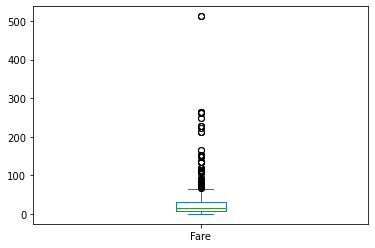

In [38]:
df['Fare'].plot(kind='box')

In [39]:
# As is clearly evident there are plenty of outliers.

In [40]:
df[df['Fare'] > 250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [41]:
# An important observation over here is that the Fare column includes the Fare of an entire family and not just an individual
 # since if we look at the Cabin columns we'll get multiple entries for most of the rows.

In [42]:
df['Fare'].isnull().sum()

0

In [43]:
# There are'nt any Missing Values in this Fare Column

### Conclusions

In [44]:
# The fare is column is highly skewed
# There are no missing values
# There are large number of outliers

In [45]:
# Univariate Analysis of Categorical Variables

In [46]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [47]:
# This suggests that out of all the passengers 549 died and 342 survived.

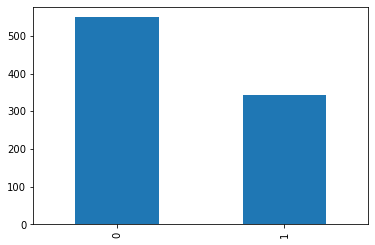

In [49]:
# Plotting a bar plot for the same
df['Survived'].value_counts().plot(kind='bar')
plt.show()

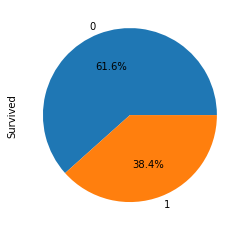

In [52]:
# Displaying the same statistics using a Pie Chart
df['Survived'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.show()

In [53]:
# So we can say that the accident was actually quite deadly to say the least.

In [60]:
df['Survived'].isnull().sum()

0

In [61]:
# No Null Values exist for 'Survived' column

In [54]:
# Now we shift our focus to the variable 'Pclass'
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [55]:
# Interestingly over here as we can see more people travelled in First Class compared to Second Class although Second Class
# Tickets are naturally chaeper than First Class. 491 passengers travelled in Third Class

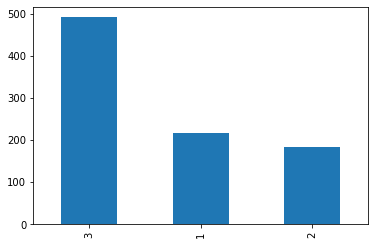

In [56]:
df['Pclass'].value_counts().plot(kind='bar')
plt.show()

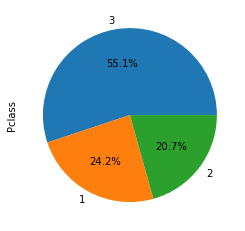

In [57]:
# Visualizing the same using Pie Chart
df['Pclass'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.show()

In [58]:
df['Pclass'].isnull().sum()

0

In [59]:
# No Null Vlaue detected for this variable either

In [62]:
# Now exploring the variable 'Sex'
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [63]:
# So there were 577 Male and 314 female passengers

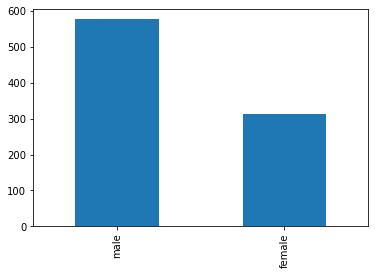

In [64]:
df['Sex'].value_counts().plot(kind='bar')
plt.show()

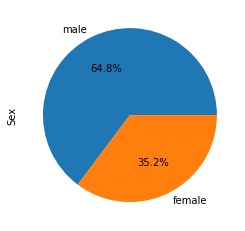

In [65]:
df['Sex'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.show()

In [66]:
df['Sex'].isnull().sum()

0

In [67]:
# No null values for 'Sex' variable too.

In [68]:
# Now let's talk about 'SibSp'
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [69]:
# So we can colude there were 608 people on board who were travelling alone. 209 travelling with a single partner and the
# rest is self explanatory

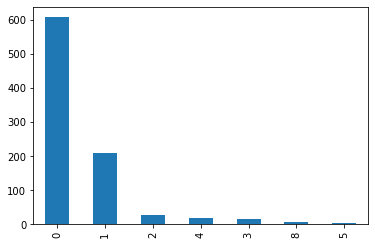

In [70]:
df['SibSp'].value_counts().plot(kind='bar')
plt.show()

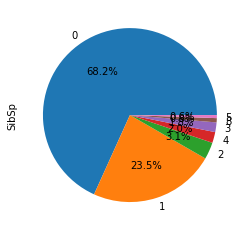

In [71]:
df['SibSp'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.show()

In [72]:
# Checking for Nulls
df['SibSp'].isnull().sum()

0

### Conclusions

In [74]:
# 'Parch' and 'SibSp' can be merged to form a new columncalled family_size
# We could have a separate column called 'is_alone'(say) for all those who were tavelling solo since there were a lot of pax

In [75]:
# Lastly we'll look into 'Embarked' column
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [76]:
# So there were 644 people who alighted the Titanic from Southampton, 168 from Chebauque and 77 from Queensland

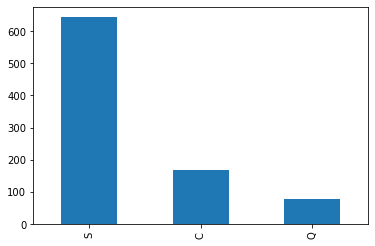

In [77]:
df['Embarked'].value_counts().plot(kind='bar')
plt.show()

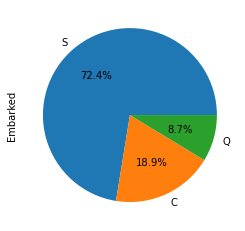

In [78]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.show()

In [79]:
df['Embarked'].isnull().sum()

2

In [82]:
# So we have 2 Null Values which can be deleted.

In [83]:
# Bivariate Analysis
#Steps of doing Bivariate Analysis
#Select 2 cols

#Understand type of relationship

#Numerical - Numerical
#  a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots
#  b. Check correlation coefficent to check linear relationship
#Numerical - Categorical - create visualizations that compare the distribution of the numerical data across different 
#     categories of the categorical data.
#  a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots
#Categorical - Categorical
#  a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column,
#     grouped by the values in the other categorical column.
#  b. You can plots like heatmap, stacked barplots, treemaps
#Write your conclusions

In [84]:
# Over here we are only considering two out of the 11 variables to be extremely important to our analysis that is 'Age' and
# 'Survived'. We shall do Bivariate analysis of these variables by pairing them with the other variables of our dataset

In [85]:
# Bivariate analysis of 'Survived' with 'Pclass'
round(pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100)

Pclass,1,2,3
Survived,,,
0,37.0,53.0,76.0
1,63.0,47.0,24.0


In [86]:
# Conslusions:-
# 63% passengers in Class 1 survived and 37% died
# 47% passengers in Class 1 survived and 53% died
# 24% passengers in Class 1 survived and 76% died

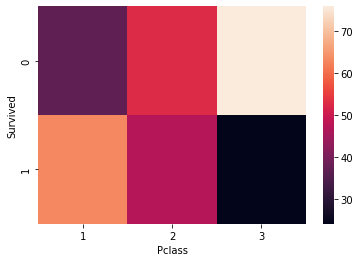

In [89]:
# Plotting a heatmap to visualize the same
sns.heatmap(round(pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100,2))
plt.show()

In [90]:
# Next we shall take the pair of 'Survived' and 'Sex' for analysis
round(pd.crosstab(df['Survived'],df['Sex'], normalize='columns')*100,2)

Sex,female,male
Survived,,
0,25.8,81.11
1,74.2,18.89


In [91]:
# So we can see over here it was clearly a case of 'Ladies First' as in Class 1 most of them survived

In [92]:
# Next we shall take the pair of 'Survived' and 'Embarked' for analysis

In [93]:
round(pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100,2)

Embarked,C,Q,S
Survived,,,
0,44.64,61.04,66.3
1,55.36,38.96,33.7


In [95]:
# Conclusions
# About 55% passengers from Chebauque survived and 45% died
# About 39% passengers from Queensland survived and 61% died
# About 34%% passengers from Southampton survived and 66% died

# Reasons why the numbers of survival are unusually high for passengers from Chebauque could be:-
# 1. They were mostly travelling in First Class
# 2. Most of them were female passengers
# 3. We could say the passengers from Chebauque wmight've been filthy rich to have tipped off the sailors to secure lifeboats
# first which is why so mnay of them survived

In [96]:
# Lets testify the above assumptions
round(pd.crosstab(df['Sex'],df['Embarked'],normalize='columns')*100,2)

Embarked,C,Q,S
Sex,,,
female,43.45,46.75,31.52
male,56.55,53.25,68.48


In [ ]:
# Safe to say Assumption 2 could be scrapped off

In [97]:
round(pd.crosstab(df['Pclass'],df['Embarked'],normalize='columns')*100,2)

Embarked,C,Q,S
Pclass,,,
1,50.60,2.60,19.72
2,10.12,3.90,25.47
3,39.29,93.51,54.81


In [98]:
# Assumption 3 emerges the clear winner here.

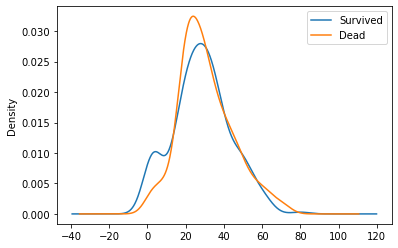

In [100]:
# Now we shall do Bivariate analysis of 'Survived' and 'Age'
df[df['Survived']==1]['Age'].plot(kind='kde', label='Survived')
df[df['Survived']==0]['Age'].plot(kind='kde', label='Dead')

plt.legend()
plt.show()

In [101]:
# Inferences from this graph is:-
# If you are an infant or a child between the ages of 0-10 then your chances of Survival were great given the fact that this
# age group was given more priority for being saved than any other.

# If your age is between 20-40 you are left on your own to fend for yourself which is why the death rate is higher as well
# Again if your age is between 60-80 chances of survival come down

In [102]:
# Feature Engineering on Fare Column

In [103]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [104]:
df[df['SibSp']==8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [105]:
69.55/11

6.322727272727272

In [106]:
df[df['Ticket']=='CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [107]:
# So although we can find that this family has about 11 members but the number of tickets suggests only 7 of them. So either
# the rest 4 members purchased other kind of ticket or we simply have No data about them

In [108]:
df[df['Name'].str.contains('Sage')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.30,B35,C
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [113]:
# So off the top of my head the rest of passengers may be in the Test dataset
df1 = pd.read_csv(r'C:\Users\Shagnik\test.csv')
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [114]:
# Concatenating the two Test and Train datasets
df = pd.concat([df,df1])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [115]:
df[df['Ticket']=='CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
188,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
342,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S


In [116]:
# We're getting all 11 members of the Sage family now

In [118]:
df['individual_fare'] = df['Fare']/(df['SibSp']+df['Parch']+1)

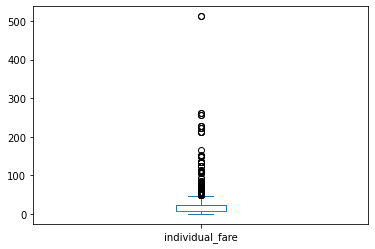

In [119]:
df['individual_fare'].plot(kind='box')
plt.show()

In [120]:
df[['individual_fare','Fare']].describe()

,individual_fare,Fare
count,1308.000000,1308.000000
mean,20.518215,33.295479
std,35.774337,51.758668
min,0.000000,0.000000
25%,7.452767,7.895800
50%,8.512483,14.454200
75%,24.237500,31.275000
max,512.329200,512.329200


In [121]:
# So we can see there is actaully an individual who had paid $512 for the journey!!

In [122]:
# Feature Engineering on 'Parch' and 'SibSp'
df['family_size']=df['Parch']+df['SibSp']+1
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1


In [124]:
# Let's define the family_type now
# 1 --> Alone
# 2-4 --> Small
# >5 --> Large

def transform_family_size(num):
    if num == 1:
        return 'Alone'
    elif num>1 and num<5:
        return 'Small'
    else:
        return 'Large'

In [125]:
df['family_type'] = df['family_size'].apply(transform_family_size)

In [126]:
# Doing a Bivariate Analysis between family_type and Survived
round(pd.crosstab(df['Survived'],df['family_type'],normalize='columns')*100,2)

family_type,Alone,Large,Small
Survived,,,
0.0,69.65,83.87,42.12
1.0,30.35,16.13,57.88


In [127]:
# This concludes that if you were travelling on the Titanic with a small family your chances of survival were more compared
# to the other two categories

In [128]:
df['surname'] = df['Name'].str.split(',').str.get(0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type,surname
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500,2,Small,Braund
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165,2,Small,Cumings
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500,1,Alone,Heikkinen
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000,2,Small,Futrelle
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000,1,Alone,Allen


In [131]:
df.drop('title', axis=1, inplace=True)

In [132]:
df['title'] = df['Name'].str.split(',').str.get(1).str.strip().str.split(' ').str.get(0)
df['title'].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
the            1
Jonkheer.      1
Dona.          1
Name: title, dtype: int64

In [133]:
df['title'] = df['title'].str.replace('Rev.','other')
df['title'] = df['title'].str.replace('Dr.','other')
df['title'] = df['title'].str.replace('Col.','other')
df['title'] = df['title'].str.replace('Major.','other')
df['title'] = df['title'].str.replace('Capt.','other')
df['title'] = df['title'].str.replace('the','other')
df['title'] = df['title'].str.replace('Jonkheer.','other')
df['title'] = df['title'].str.replace('Don.','other')

C:\Users\Shagnik\AppData\Local\Temp\ipykernel_16732\1375311103.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace('Rev.','other')
C:\Users\Shagnik\AppData\Local\Temp\ipykernel_16732\1375311103.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace('Dr.','other')
C:\Users\Shagnik\AppData\Local\Temp\ipykernel_16732\1375311103.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace('Col.','other')
C:\Users\Shagnik\AppData\Local\Temp\ipykernel_16732\1375311103.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace('Major.','other')
C:\Users\Shagnik\AppData\Local\Temp\ipykernel_16732\1375311103.py:5: FutureWarning: The default value of regex will change 

In [134]:
df['title'].value_counts()

Mr.        757
Miss.      260
Mrs.       197
Master.     61
ootherr     23
other        3
Ms.          2
Mlle.        2
Mme.         1
Lady.        1
Sir.         1
other.       1
Name: title, dtype: int64

In [136]:
temp_df = df[df['title'].isin(['Mr.','Mrs.','Master.','Miss.','ootherr'])]

In [137]:
round(pd.crosstab(temp_df['Survived'],temp_df['title'],normalize='columns')*100,2)

title,Master.,Miss.,Mr.,Mrs.,ootherr
Survived,,,,,
0.0,42.5,30.22,84.33,20.8,72.22
1.0,57.5,69.78,15.67,79.2,27.78


In [138]:
# Clearly Ladies on board had better chances of survival

In [141]:
# now lets look at Cabin
round(df['Cabin'].isnull().sum()/len(df['Cabin'])*100,2)

77.46

In [142]:
# We can see about 77% missing values

In [143]:
# But with context to the Titanic the Cabin too hides useful bits of information which needs to be uncovered

In [144]:
df['Cabin'].fillna('M', inplace=True)

In [146]:
df['Cabin'].value_counts()

M                  1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F33                   4
                   ... 
A14                   1
E63                   1
E12                   1
E38                   1
C105                  1
Name: Cabin, Length: 187, dtype: int64

In [148]:
# lets figure out the decks the passengers belonged to
df['deck'] = df['Cabin'].str[0]
df['deck'].value_counts()

M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: deck, dtype: int64

In [149]:
# Now lets figure out what classes of people belonged to each deck
pd.crosstab(df['deck'],df['Pclass'])

Pclass,1,2,3
deck,,,
A,22,0,0
B,65,0,0
C,94,0,0
D,40,6,0
E,34,4,3
F,0,13,8
G,0,0,5
M,67,254,693
T,1,0,0


In [150]:
round(pd.crosstab(df['Survived'],df['deck'], normalize='columns')*100,2)

deck,A,B,C,D,E,F,G,M,T
Survived,,,,,,,,,
0.0,53.33,25.53,40.68,24.24,25.0,38.46,50.0,70.01,100.0
1.0,46.67,74.47,59.32,75.76,75.0,61.54,50.0,29.99,0.0


In [151]:
# hances of Survival on B,C,D,E and F decks were higher

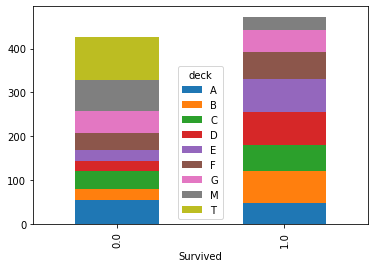

In [153]:
round(pd.crosstab(df['Survived'],df['deck'], normalize='columns')*100,2).plot(kind='bar',stacked=True)
plt.show()

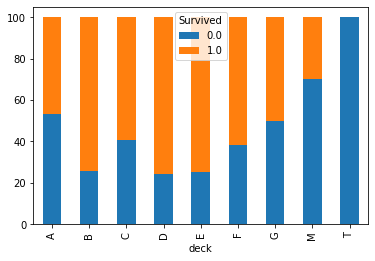

In [154]:
round(pd.crosstab(df['deck'],df['Survived'], normalize='index')*100,2).plot(kind='bar',stacked=True)
plt.show()

In [155]:
# For Multivarite Analysis we shall be using a Heatmap
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,individual_fare,family_size
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428,0.035365,-0.031437
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.221600,0.016639
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629,-0.504270,0.050027
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740,0.193545,-0.240229
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238,-0.089807,0.861952
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539,-0.065498,0.792296
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000,0.832029,0.226492
individual_fare,0.035365,0.221600,-0.504270,0.193545,-0.089807,-0.065498,0.832029,1.000000,-0.094874
family_size,-0.031437,0.016639,0.050027,-0.240229,0.861952,0.792296,0.226492,-0.094874,1.000000


In [158]:
df.corr()['Survived']

PassengerId       -0.005007
Survived           1.000000
Pclass            -0.338481
Age               -0.077221
SibSp             -0.035322
Parch              0.081629
Fare               0.257307
individual_fare    0.221600
family_size        0.016639
Name: Survived, dtype: float64

In [159]:
# So we can see here that Individual_fare and Fare have a pretty high positive correlation. So more rich you are
# better are your chances of survival.

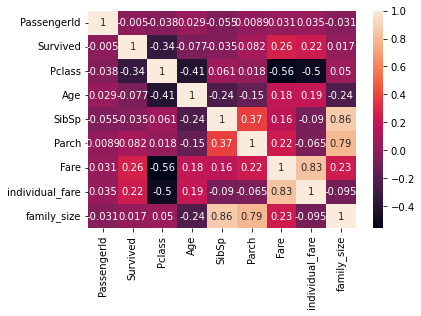

In [160]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [161]:
# Gives us the correlation of each numerical value with other numerical values

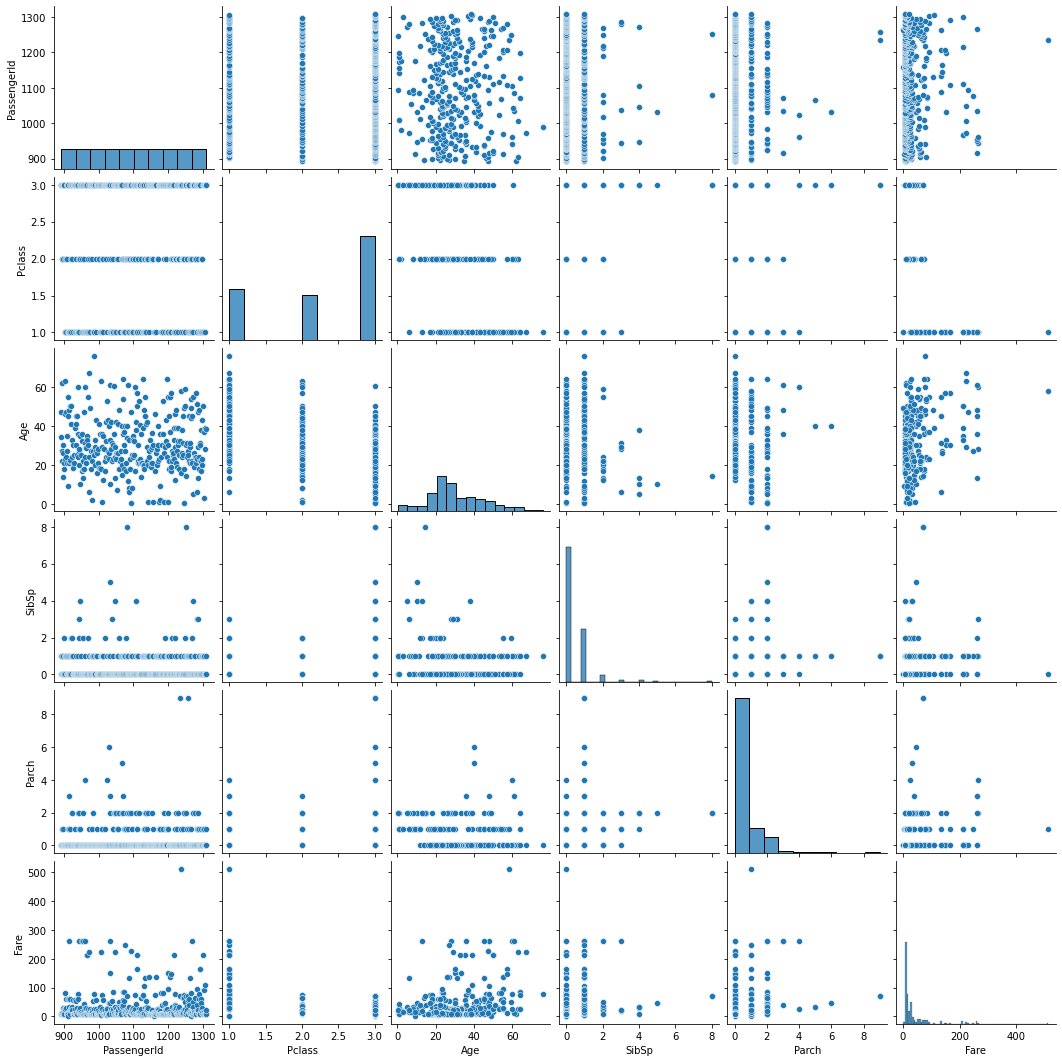

In [163]:
# We could also use a Pairplot
sns.pairplot(df1)
plt.show()